In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load and prepare data
data = load_iris()
X = data.data
y = data.target
feature_names = list(data.feature_names)
target_names = list(data.target_names)

In [3]:
# df = pd.read_csv ("test_dataset.csv")
# df.dropna(inplace=True)

# target_names = [
#     "Poor Session", "Below Average", "Average Session", "Above Average", 
#     "Good Session", "Great Session", "Excellent Session", 
#     "Outstanding", "Legendary", "Epic"
# ]
# feature_names = ['engine_age', 'length', 'power', 'month', 'weight', 'y_month',
#        'year', 'surf_temp']

# #remove non numerical data 
# # value adjusted for inflation (check dataset page for more info)
# # other non relevant/not known features 
# df.drop(["landing", "patch", "value_cpi", "y_", "ID", "dist", "patch_area", "weight_lym", "weight_lm", "val_lm", "val_lym", "nao_index", "price"], axis=1, inplace=True)

# y = df["value"]
# X = df[feature_names]

# # Split the values into 10 categories with meaningful labels
# y = pd.cut(y, bins=10, labels=target_names)

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)  # Convert categories to numerical values

In [4]:
# Standardize the dataset (PCA is affected by the scale of the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the first few rows of the standardized data
pd.DataFrame(X_scaled, columns=feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the first few rows of the PCA-transformed data
pd.DataFrame(X_pca, columns=['PC1', 'PC2']).head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [6]:
# # Create a scatter plot of the data in the 2D PCA space
# plt.figure(figsize=(8, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
# plt.title('Iris Dataset in 2D PCA Space')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Target Class')
# plt.show()

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Check the accuracy of the classifier
accuracy = dt_classifier.score(X_test, y_test)
# print(f'Accuracy of Decision Tree Classifier: {accuracy:.2f}')

In [8]:
# # Visualize the trained decision tree
# plt.figure(figsize=(12, 8))
# plot_tree(dt_classifier, filled=True, feature_names=feature_names, class_names=target_names, rounded=True)
# plt.title('Decision Tree Classifier - Splits on Features')
# plt.show()

In [9]:
# Train the classifier again on the PCA-reduced data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
dt_classifier_pca = DecisionTreeClassifier(random_state=42)
dt_classifier_pca.fit(X_train_pca, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Plot decision boundary in the 2D PCA space
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = dt_classifier_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

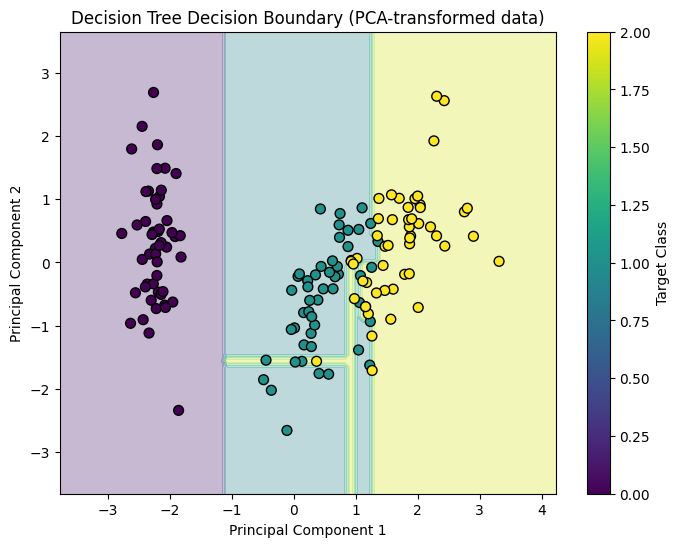

In [11]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Decision Tree Decision Boundary (PCA-transformed data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')
plt.show()